In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading datasets
user_details = pd.read_csv("UserDetails.csv")
cooking_sessions = pd.read_csv("CookingSessions.csv")
order_details = pd.read_csv("OrderDetails.csv")

In [3]:
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type     Session Start  \
0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00   
1       S002    U002     Caesar Salad      Lunch  2024-12-01 12:00   
2  

In [4]:
print(user_details.columns)
print(cooking_sessions.columns)
print(order_details.columns)

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')


In [14]:
# DATA CLEANING
# clean cloumn names
user_details.columns = user_details.columns.str.strip().str.lower()
print("cleaned userdeails columns:", user_details.columns)
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower()
print("cleaned  cooking_sessions columns: ", cooking_sessions.columns)
order_details.columns = order_details.columns.str.strip().str.lower()
print("cleaned order details colums", order_details.columns)

cleaned userdeails columns: Index(['user id', 'user name', 'age', 'location', 'registration date', 'phone',
       'email', 'favorite meal', 'total orders'],
      dtype='object')
cleaned  cooking_sessions columns:  Index(['session id', 'user id', 'dish name', 'meal type', 'session start',
       'session end', 'duration (mins)', 'session rating'],
      dtype='object')
cleaned order details colums Index(['order id', 'user id', 'order date', 'meal type', 'dish name',
       'order status', 'amount (usd)', 'time of day', 'rating', 'session id'],
      dtype='object')


In [19]:
# check for missing values
print("Missing values in user deails:\n",user_details.isnull().sum())
print(" Missing values in cooking session:\n",cooking_sessions.isnull().sum())
print("Missing values in order deatils:\n",order_details.isnull().sum())

Missing values in user deails:
 user id              0
user name            0
age                  0
location             0
registration date    0
phone                0
email                0
favorite meal        0
total orders         0
dtype: int64
 Missing values in cooking session:
 session id         0
user id            0
dish name          0
meal type          0
session start      0
session end        0
duration (mins)    0
session rating     0
dtype: int64
Missing values in order deatils:
 order id        0
user id         0
order date      0
meal type       0
dish name       0
order status    0
amount (usd)    0
time of day     0
rating          2
session id      0
dtype: int64


In [21]:
# Handling missing values
order_details['rating']= order_details['rating'].fillna(order_details['rating'].mean())
print("Missing values after handling :\n",order_details.isnull().sum())

Missing values after handling :
 order id        0
user id         0
order date      0
meal type       0
dish name       0
order status    0
amount (usd)    0
time of day     0
rating          0
session id      0
dtype: int64


In [23]:
# Merging Datasets
merged_data = user_details.merge(cooking_sessions,on = 'user id', how = 'left')
merged_data = merged_data.merge(order_details,on = 'user id', how = 'left')
print(merged_data)

   user id      user name  age       location registration date         phone  \
0     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
2     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
3     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
4     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
5     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
6     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
7     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
8     U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
9     U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
10    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
11    U002      Bob Smith   

In [31]:
# calculate total sessions
session_counts = cooking_sessions.groupby('user id')['session id'].count().reset_index()
session_counts.rename(columns = {'session id':'total sessions'},inplace = True)

In [32]:
merged_data = merged_data.merge(session_counts, on = 'user id', how = 'left')
merged_data

,user id,user name,age,location,registration date,phone,email,favorite meal,total orders,session id_x,...,meal type_y,dish name_y,order status,amount (usd),time of day,rating,session id_y,total sessions_x,total sessions_y,total sessions
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,3.0,3.0,3.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,3.0,3.0,3.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,Dinner,Grilled Chicken,Completed,12.0,Night,5.000000,S009,3.0,3.0,3.0
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,3.0,3.0,3.0
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,3.0,3.0,3.0
5,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,Dinner,Grilled Chicken,Completed,12.0,Night,5.000000,S009,3.0,3.0,3.0
6,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,3.0,3.0,3.0
7,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,3.0,3.0,3.0
8,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,Dinner,Grilled Chicken,Completed,12.0,Night,5.000000,S009,3.0,3.0,3.0
9,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,Lunch,Caesar Salad,Completed,10.0,Day,4.000000,S002,3.0,3.0,3.0


In [33]:
# convet  total session  to numric to ensure calculation work
merged_data['total sessions']= pd.to_numeric(merged_data['total sessions'], errors = 'coerce')

In [34]:
# calculating order per session
merged_data['total sessions']= merged_data['total sessions'].replace(0,1e-6)
merged_data['orders per session']= merged_data['total orders']/merged_data['total sessions']

In [35]:
# verify new columns
print(merged_data[['user id', 'total sessions', 'orders per session']].head())

  user id  total sessions  orders per session
0    U001             3.0                 4.0
1    U001             3.0                 4.0
2    U001             3.0                 4.0
3    U001             3.0                 4.0
4    U001             3.0                 4.0


#  Analyze the data

In [36]:
popular_dishes = merged_data['dish name_y'].value_counts().head(5)
print("Top 5 popular dishes:\n", popular_dishes)

Top 5 popular dishes:
 Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Name: dish name_y, dtype: int64


In [38]:
if 'gender' in merged_data.columns:
    order_by_gender = merged_data.groupby('gender')['total orders'].sum()
    print("orders bt Gender:\n", orders_by_gender)
else:
    print("Gender columns not found in the dataset!")

Gender columns not found in the dataset!


In [39]:
# 3. Analyze order bu age group
if 'age' in merged_data.columns:
    merged_data['agegroup'] = pd.cut(merged_data['age'],bins = [18,25,35,50,100],labels=["18-25","26-35","36-50","51+"])
    orders_by_age = merged_data.groupby('agegroup')['total orders'].sum()
    print("orders by Age Group:\n", orders_by_age)
else:
    print("Age columns not found in dataset!")

orders by Age Group:
 agegroup
18-25      7
26-35    275
36-50    149
51+        0
Name: total orders, dtype: int64


# VISUALIZE THE DATA

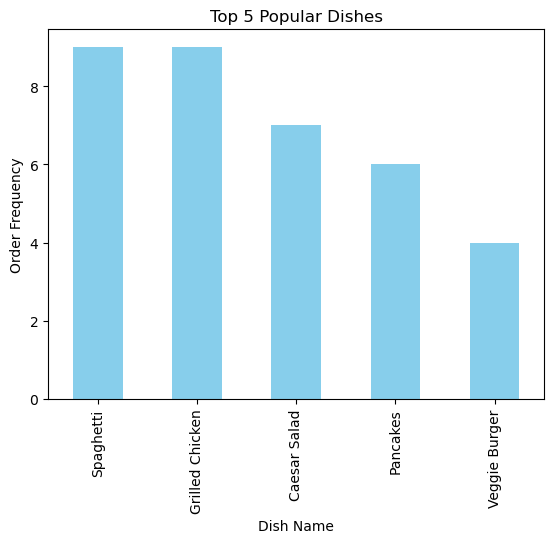

In [40]:
# 1. Bar Chart for Top 5 Popular Dishes
popular_dishes.plot(kind='bar', color='skyblue')
plt.title("Top 5 Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Order Frequency")
plt.show()


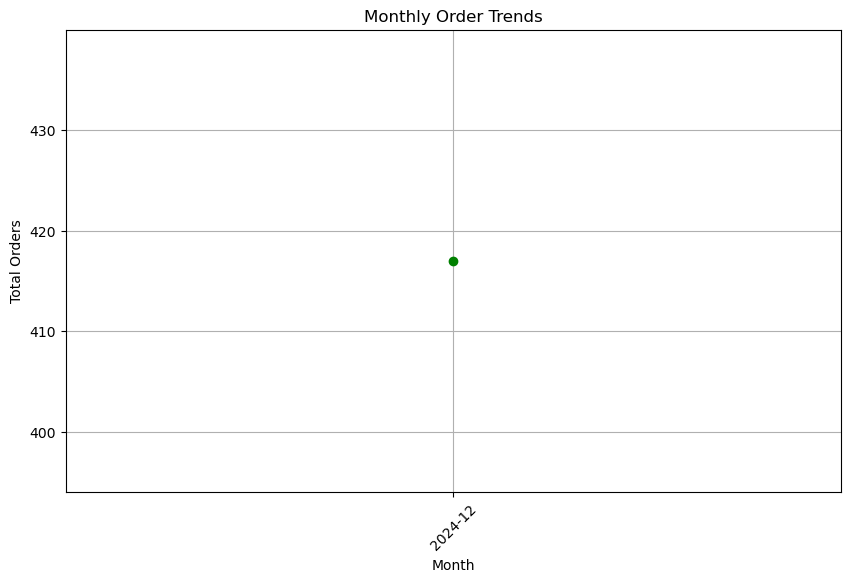

In [44]:
# 3. Line Chart for Monthly Order Trends
merged_data['order date'] = pd.to_datetime(merged_data['order date'], errors='coerce')
merged_data['year_month'] = merged_data['order date'].dt.to_period('M')
monthly_orders = merged_data.groupby('year_month')['total orders'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['year_month'].astype(str), monthly_orders['total orders'], marker='o', color='green')
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

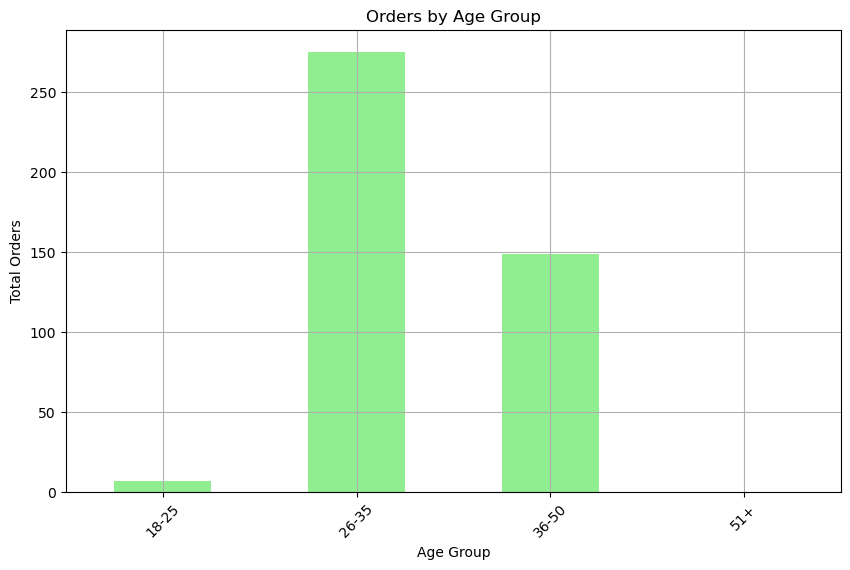

In [45]:
# 4. Bar Chart for Orders by Age Group
merged_data['agegroup'] = pd.cut(merged_data['age'], bins=[18, 25, 35, 50, 100], labels=["18-25", "26-35", "36-50", "51+"])
orders_by_age = merged_data.groupby('agegroup')['total orders'].sum()
plt.figure(figsize=(10, 6))
orders_by_age.plot(kind='bar', color='lightgreen')
plt.title("Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
## Summary of Analysis

In this project,  analyzed user behavior, cooking preferences, and order trends from three datasets: `UserDetails`, `CookingSessions`, and `OrderDetails`.

Key steps in the analysis:
1. Data cleaning: handled missing values, merged datasets, and ensured proper data types.
2. Data exploration: analyzed popular dishes and orders by age group.
3. Trend analysis: explored monthly order trends to identify peak sales periods.
